# 用SVM对特征进行分类
2019年02月27日

In [1]:
import sklearn
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import os
import os.path as path
import pickle
from tqdm import tqdm as progress

## 对每个样本抽取时间序列的中间长度为800帧的子序列

In [2]:
def select_mid(sample, length=800):
    '''
    sample - shape like (40, Tx) (Tx ≥ 800)
    length - length of selected sequence
    
    return - selected 800 time frames in the sample, shape like (40, 800)
    '''
    mid = sample.shape[1] // 2
    semi_len = length // 2
    return sample[:, mid - semi_len : mid + semi_len]

In [3]:
os.chdir('../Data/Sounds/yzc/')
os.listdir()

['Positive', '.DS_Store', 'Negative', 'origin']

In [4]:
samples = []
labels = []
time_len = 

In [5]:
os.chdir('Positive/')
for filename in progress(os.listdir()):
    if filename.endswith('.ftr'):
        with open(filename, 'rb') as f:
            sample = pickle.load(f)
        sample = select_mid(sample, time_len)
        samples.append(sample)
        labels.append('+')
        
os.chdir('../Negative/')
for filename in progress(os.listdir()):
    if filename.endswith('.ftr'):
        with open(filename, 'rb') as f:
            sample = pickle.load(f)
        sample = select_mid(sample, time_len)
        samples.append(sample)
        labels.append('-')

100%|██████████| 73/73 [00:00<00:00, 1994.39it/s]


## 扁平化特征分类法

In [8]:
# flatten features
flatten_samlpes = [sample.flatten() for sample in samples]

In [10]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(flatten_samlpes, labels, shuffle=True, test_size=0.2)

In [11]:
clf1 = SVC(kernel='rbf', gamma=1e-8)
clf1.fit(X_train1, Y_train1)
clf1.score(X_train1, Y_train1)

0.8947368421052632

In [12]:
clf1.score(X_test1, Y_test1)

0.9333333333333333

In [13]:
len(X_train1)

57

In [14]:
len(X_test1)

15

In [12]:
os.chdir('../../../../voice/')

### 保存模型

In [13]:
with open('flatten-svc.obj', 'wb') as f:
    pickle.dump(clf1, f)

## 对每一帧打分，加权投票法

In [16]:
# average features
avg_samples = [sample.mean(axis=1) for sample in samples]

In [59]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(avg_samples, labels, shuffle=True, test_size=0.2)

In [62]:
clf2 = SVC(kernel='rbf', gamma=1e-3)
clf2.fit(X_train2, Y_train2)
clf2.score(X_train2, Y_train2)

0.9824561403508771

In [63]:
clf2.score(X_test2, Y_test2)

0.8666666666666667

### 保存模型

In [162]:
with open('average-svc.obj', 'wb') as f:
    pickle.dump(clf2, f)

### 前两维特征可视化

In [35]:
import matplotlib.pyplot as plt

In [36]:
class_p, class_n = [], []
for sample, label in zip(avg_samples, labels):
    if label == '+':
        class_p.append(sample)
    else:
        class_n.append(sample)
class_p = np.array(class_p)
class_n = np.array(class_n)

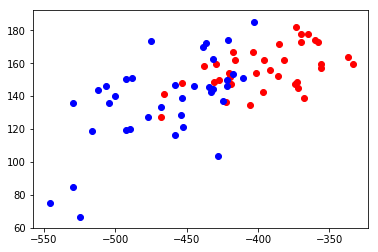

In [37]:
plt.scatter(class_p[:, 0], class_p[:, 1], c='red')
plt.scatter(class_n[:, 0], class_n[:, 1], c='blue')
plt.show()

### PCA主成分可视化

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA()
X = pca.fit_transform(avg_samples)

In [40]:
pca.explained_variance_ratio_ # PC占比

array([7.70733108e-01, 8.51605174e-02, 3.86903810e-02, 3.35206197e-02,
       2.23819618e-02, 1.36596630e-02, 5.98939014e-03, 4.70601627e-03,
       3.92712527e-03, 3.57415910e-03, 2.72773380e-03, 2.49001875e-03,
       1.83062097e-03, 1.60332822e-03, 1.34009570e-03, 1.22919187e-03,
       9.90127809e-04, 8.51601442e-04, 6.59718746e-04, 5.77665084e-04,
       4.95936870e-04, 4.28801867e-04, 3.82049828e-04, 3.66773266e-04,
       3.07604195e-04, 2.46289103e-04, 2.40153027e-04, 1.80523743e-04,
       1.65482203e-04, 1.54030777e-04, 1.09111832e-04, 6.91386947e-05,
       6.59216912e-05, 6.16042245e-05, 5.01616462e-05, 2.69935548e-05,
       6.02102438e-06, 3.54345701e-07, 4.36398483e-09, 4.32689690e-12])

In [41]:
class_p, class_n = [], []
for sample, label in zip(X, labels):
    if label == '+':
        class_p.append(sample)
    else:
        class_n.append(sample)
class_p = np.array(class_p)
class_n = np.array(class_n)

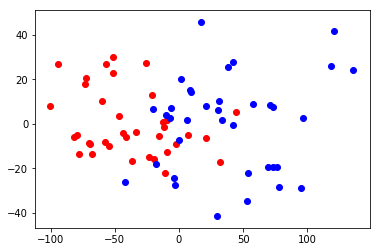

In [42]:
plt.scatter(class_p[:, 0], class_p[:, 1], c='red')
plt.scatter(class_n[:, 0], class_n[:, 1], c='blue')
plt.show()

## Leave One Out

In [65]:
os.chdir('../../MP3')

In [66]:
samples_, labels_ = [], []

os.chdir('Positive/')
for filename in progress(os.listdir()):
    if filename.endswith('.ftr'):
        with open(filename, 'rb') as f:
            sample = pickle.load(f)
        sample = select_mid(sample, time_len)
        samples_.append(sample)
        labels_.append('+')
        
os.chdir('../Negative/')
for filename in progress(os.listdir()):
    if filename.endswith('.ftr'):
        with open(filename, 'rb') as f:
            sample = pickle.load(f)
        sample = select_mid(sample, time_len)
        samples_.append(sample)
        labels_.append('-')

100%|██████████| 70/70 [00:00<00:00, 1314.26it/s]


In [149]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(avg_samples, labels, shuffle=True, test_size=0.1)
clf2 = SVC(kernel='linear', gamma=1e-5)
clf2.fit(X_train2, Y_train2)
print(clf2.score(X_train2, Y_train2))
print(clf2.score(X_test2, Y_test2))
print('>>', clf2.score(avg_samples_, labels_))

1.0
1.0
>> 0.8142857142857143


In [76]:
# average features
avg_samples_ = [sample.mean(axis=1) for sample in samples_]

0.7714285714285715

In [71]:
# flatten features
flatten_samlpes_ = [sample.flatten() for sample in samples_]

In [73]:
clf1.score(flatten_samlpes_, labels_)

0.8714285714285714

## Todo
- 哪些容易被错分？
- 一个源音频提供多个.ftr
- 50% overlap